

#### PERFORMANCE ANALYSIS OF MACHINE LEARNING ALGORITHMS FOR MONITORING HUMAN ACTIVITY RECOGNITION 





The purpose of this thesis is to predict human behavior based upon wearable sensor data and Smartphone data and perform a comparative study of performance between multiple classification algorithms. We will be using publicly available UCI data set for this study. As this data is not derived from our experiment, so it becomes crucial to check the dataset for all the data quality issues. Otherwise, data quality issues can provide irrelevant results, so in order to prepare data for building models,

-
1. Data load and Dataset description
2. Data preparation & Data check
3. Exploratory Data Analysis
4. Dummy Variable Creation
5. Standardization of the datset
6. Splitting of Original Dataset between test and train


***Data Load and Understanding***

***

In [60]:
### import all the required Library

import pandas as pd
import numpy as np
import glob
import missingno as msno 
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import KFold  
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 


from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

- **1. Data load and Dataset description**

This data set is taken from the UCI dataset. Data is available in two folder S1 and S2. Folder S1_dataset has 60 files, and Folder S2 has 30 files. These files represent sensor data for individual trials performed by a subject wearing a wireless, batteryless sensor.
Based upon the above-mentioned activity, Sensor can predict four activity as below:-

1.	Sit on bed
2.	Sit on chair
3.	Lying
4.	Ambulating like Getting off the bed, Getting off the chair 

The files are anonymized so we can not identify the subject, but room and gender can be identified by the file name. The last character of the file name represents the gender while 2nd character of the file name represents room number. for example:- 
File name d2p01f represents female, and room two but d1p43M represent room One and male.
There are 52482 records in S1 folder files and 22646 records in the S2 folder. Total records are 75128 records in the final dataset and 11 columns, including Room and Gender.
.



In [61]:
#find all files in the S1_Dataset. Note:- remove the readme file.

file_path='C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S1_Dataset'
User_files=glob.glob(file_path+'/*')
print(User_files)

['C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S1_Dataset\\d1p01M', 'C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S1_Dataset\\d1p02M', 'C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S1_Dataset\\d1p03M', 'C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S1_Dataset\\d1p04M', 'C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S1_Dataset\\d1p05M', 'C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S1_Dataset\\d1p06M', 'C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S1_Dataset\\d1p07M', 'C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S1_Dataset\\d1p08F', 'C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S1_Dataset\\d1p09F', 'C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S1_Dataset\\d1p10F', 'C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S1_Dataset\\d1p11F', 'C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S1_Dataset\\

In [62]:
## These are the text file data , lets upload all the test file data in to Dataframe

data=[]
for User_data in User_files:
    if User_data.endswith('.txt'):
        continue
    df_user=pd.read_csv(User_data,header=None,index_col=None)
    
    gender=User_data[-1]
    room=User_data[-5]
    df_user['gender'] = gender
    df_user['room']=room
    data.append(df_user)
   
df_data=pd.concat(data,axis=0,ignore_index=True)
df_data.shape 
   

(52482, 11)

- In S1 Data set folder there are 52482 record 

In [63]:
#find all files in the S2_Dataset. Note:- remove the readme file.

file_path='C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S2_Dataset'
User_files=glob.glob(file_path+'/*')
print(User_files)

['C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S2_Dataset\\d2p01F', 'C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S2_Dataset\\d2p02F', 'C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S2_Dataset\\d2p03F', 'C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S2_Dataset\\d2p04F', 'C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S2_Dataset\\d2p05F', 'C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S2_Dataset\\d2p06F', 'C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S2_Dataset\\d2p07F', 'C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S2_Dataset\\d2p08F', 'C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S2_Dataset\\d2p09F', 'C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S2_Dataset\\d2p10F', 'C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S2_Dataset\\d2p11F', 'C:/Users/goelr/Documents/Personal/Upgrad/Activity_Recognition/S2_Dataset\\

In [64]:
## These are the text file data , lets upload all the test file data in to Dataframe
##In addition, gender of participant is included in the last character of file name eg: d1p33F (F:female).

data=[]
for User_data in User_files:
    if User_data.endswith('.txt'):
        continue
    df_user=pd.read_csv(User_data,header=None,index_col=None)
    
    gender=User_data[-1]
    room=User_data[-5]
    df_user['gender'] = gender
    df_user['room']=room
    data.append(df_user)
   
df_data1=pd.concat(data,axis=0,ignore_index=True)
df_data1.shape

(22646, 11)

- In S2 Data set folder there are 22646 record 

In [65]:
## Create the final Data Set and check 
df_data=  pd.concat([df_data,df_data1])
df_data.head()
df_data.tail()

,0,1,2,3,4,5,6,7,8,gender,room
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.4252,924.25,1,M,1
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75,1,M,1
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75,1,M,1
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25,1,M,1
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25,1,M,1


,0,1,2,3,4,5,6,7,8,gender,room
22641,444.00,0.90520,0.64076,-0.082102,1,-59.5,1.9574,922.25,2,F,2
22642,449.00,0.90520,0.64076,-0.082102,1,-59.0,6.2540,922.25,2,F,2
22643,451.50,0.42446,0.91636,-0.161920,1,-53.0,5.7156,922.25,4,F,2
22644,451.58,0.42446,0.91636,-0.161920,1,-52.0,5.8982,922.25,4,F,2
22645,452.25,0.58862,0.87042,-0.082102,1,-60.0,5.7033,925.75,4,F,2


In [66]:
## Lets Add Columns as per information provided in read me file

#The content of the file is as follows:
#Comma separated values (CSV) format.
#Column 1: Time in seconds starting from 0 rounded to the closest 0.025s
#Column 2: Acceleration reading in G for frontal axis
#Column 3: Acceleration reading in G for vertical axis
#Column 4: Acceleration reading in G for lateral axis
#Column 5: Id of antenna reading sensor
#Column 6: Received signal strength indicator (RSSI) 
#Column 7: Phase
#Column 8: Frequency
#Column 9: Label of activity, 1: sit on bed, 2: sit on chair, 3: lying, 4: ambulating
#Colum10 : Gender of participant is included in the last character of file name eg: d1p33F (F:female).
#Colum11:  There are data from two clinical room settings (S1 and S2)

df_data.columns=['Time_Sec','Acc_Front_axis','Acc_vert_axis','Acc_Lat_axis','id_Antenna','RSSI','Phase','Freq','Activity Label', 'Gender','Room']
df_data.head()
df_data.tail()
df_data.shape

,Time_Sec,Acc_Front_axis,Acc_vert_axis,Acc_Lat_axis,id_Antenna,RSSI,Phase,Freq,Activity Label,Gender,Room
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.4252,924.25,1,M,1
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75,1,M,1
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75,1,M,1
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25,1,M,1
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25,1,M,1


,Time_Sec,Acc_Front_axis,Acc_vert_axis,Acc_Lat_axis,id_Antenna,RSSI,Phase,Freq,Activity Label,Gender,Room
22641,444.00,0.90520,0.64076,-0.082102,1,-59.5,1.9574,922.25,2,F,2
22642,449.00,0.90520,0.64076,-0.082102,1,-59.0,6.2540,922.25,2,F,2
22643,451.50,0.42446,0.91636,-0.161920,1,-53.0,5.7156,922.25,4,F,2
22644,451.58,0.42446,0.91636,-0.161920,1,-52.0,5.8982,922.25,4,F,2
22645,452.25,0.58862,0.87042,-0.082102,1,-60.0,5.7033,925.75,4,F,2


(75128, 11)

- There are 75128 record in S1 and S2 Data folder 


 ## 2. ***Data Check & Data Prepation Steps**

***

In [67]:
## Data check 
# feature type summary
df_data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75128 entries, 0 to 22645
Data columns (total 11 columns):
Time_Sec          75128 non-null float64
Acc_Front_axis    75128 non-null float64
Acc_vert_axis     75128 non-null float64
Acc_Lat_axis      75128 non-null float64
id_Antenna        75128 non-null int64
RSSI              75128 non-null float64
Phase             75128 non-null float64
Freq              75128 non-null float64
Activity Label    75128 non-null int64
Gender            75128 non-null object
Room              75128 non-null object
dtypes: float64(7), int64(2), object(2)
memory usage: 6.9+ MB


In [68]:
# Let's check the dataframe shapes
print("\nThe  data size is: {} ".format(df_data.shape))


The  data size is: (75128, 11) 


In [69]:
#How many columns with different datatypes are there?
df_data.get_dtype_counts()

float64    7
int64      2
object     2
dtype: int64

In [70]:
# Summary statistics for the numerical columns 
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time_Sec,75128.0,299.080416,257.503002,0.00000,121.250000,250.715000,402.500000,1739.4000
Acc_Front_axis,75128.0,0.714211,0.404585,-0.74808,0.342380,0.682420,1.104500,1.5032
Acc_vert_axis,75128.0,0.345199,0.419041,-0.55349,-0.002297,0.215880,0.858940,2.0302
Acc_Lat_axis,75128.0,-0.217477,0.438219,-1.33640,-0.184730,-0.070699,0.031928,1.2178
id_Antenna,75128.0,2.409581,1.102165,1.00000,1.000000,3.000000,3.000000,4.0000
RSSI,75128.0,-58.277253,5.174083,-72.00000,-62.000000,-58.000000,-56.000000,-38.5000
Phase,75128.0,3.157279,2.182257,0.00000,1.032400,2.767300,5.358575,6.2817
Freq,75128.0,922.670536,1.679093,920.25000,921.250000,922.750000,924.250000,925.7500
Activity Label,75128.0,2.528378,0.864258,1.00000,2.000000,3.000000,3.000000,4.0000


In [71]:
# Finding the Missing Data Count & Percentage of our Data Frame
total = df_data.isnull().sum().sort_values(ascending = False)
percent = (df_data.isnull().sum()/df_data.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data = missing_data[missing_data.Total != 0]
missing_data

,Total,Percent


-- There is no Missing Data for any column

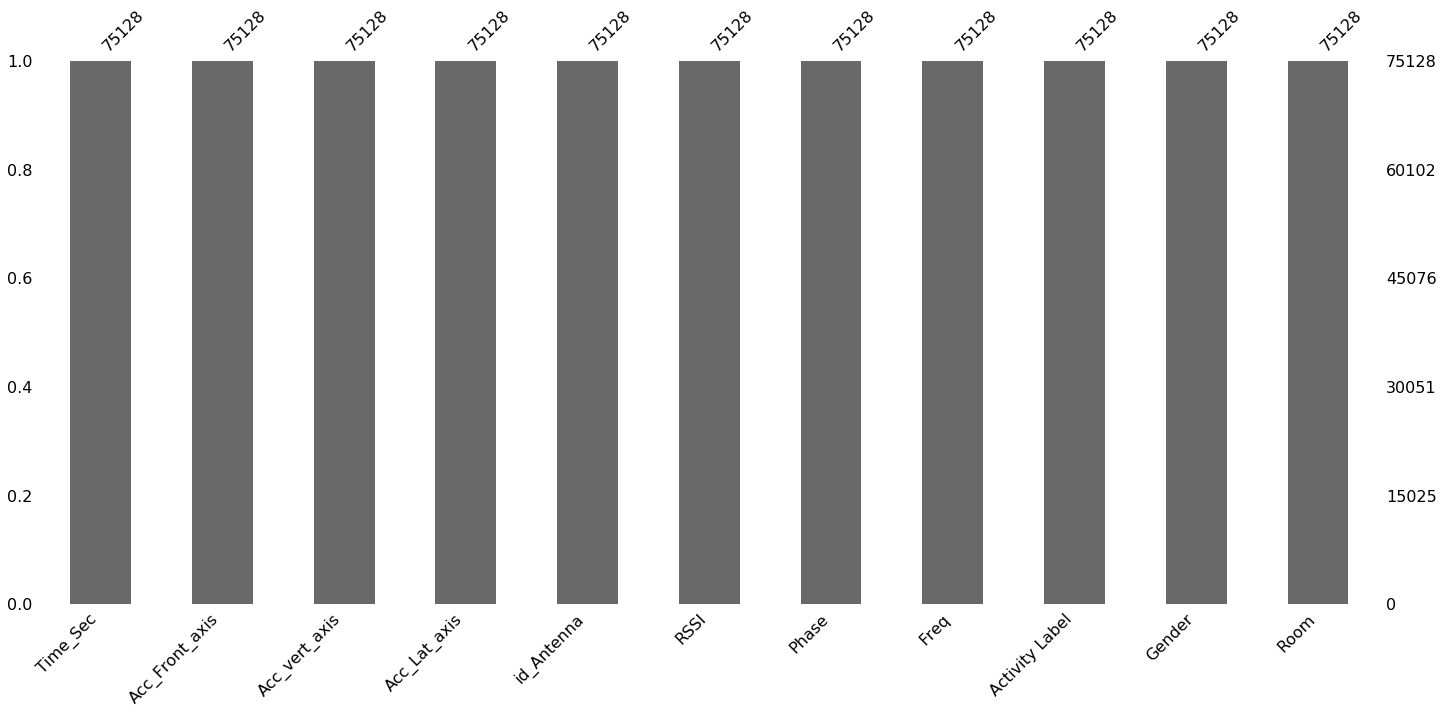

In [72]:
msno.bar(df_data) 

In [73]:
## We can see that Hospital overall rating has below possible value
df_data['Activity Label'].value_counts()

3    51520
1    16406
2     4911
4     2291
Name: Activity Label, dtype: int64

- Label of activity, 1: sit on bed, 2: sit on chair, 3: lying, 4: ambulating:-

1. There are 51520 record for Activity 3 (Lying)
2. There are 16406 record for Activity 1 (Sit on bed)
3. There are 4911 Record for Activity 2 (Sit on Chair)
4. There are 2291 record for Activity 4 ( Ambulating)

In [74]:
## Check all the columns for df d Data set
df_data.columns

Index(['Time_Sec', 'Acc_Front_axis', 'Acc_vert_axis', 'Acc_Lat_axis',
       'id_Antenna', 'RSSI', 'Phase', 'Freq', 'Activity Label', 'Gender',
       'Room'],
      dtype='object')

In [75]:
df_data['Activity']= df_data['Activity Label']

In [76]:
di = {1: "Sit On Bed", 2: "Sit On Chair",3: "Lying", 4: "Ambulating"}

In [77]:
df_data['Activity']=df_data['Activity'].replace(di)

In [78]:
df_data['Activity']

0          Sit On Bed
1          Sit On Bed
2          Sit On Bed
3          Sit On Bed
4          Sit On Bed
5          Sit On Bed
6          Sit On Bed
7          Sit On Bed
8          Sit On Bed
9          Sit On Bed
10         Sit On Bed
11         Sit On Bed
12         Sit On Bed
13         Sit On Bed
14         Sit On Bed
15         Sit On Bed
16         Sit On Bed
17         Sit On Bed
18         Sit On Bed
19         Sit On Bed
20         Sit On Bed
21         Sit On Bed
22         Sit On Bed
23         Sit On Bed
24         Sit On Bed
25         Sit On Bed
26         Sit On Bed
27         Sit On Bed
28         Sit On Bed
29         Sit On Bed
30         Sit On Bed
31         Sit On Bed
32         Sit On Bed
33         Sit On Bed
34         Sit On Bed
35         Sit On Bed
36         Sit On Bed
37         Sit On Bed
38         Sit On Bed
39         Sit On Bed
40         Sit On Bed
41         Sit On Bed
42         Sit On Bed
43         Sit On Bed
44         Sit On Bed
45        

<Figure size 576x504 with 0 Axes>

No handles with labels found to put in legend.


[Text(0, 0.5, 'Number of Records'), Text(0.5, 0, 'Activity')]

Text(0, 10, '51520.0')

Text(0, 10, '16406.0')

Text(0, 10, '4911.0')

Text(0, 10, '2291.0')

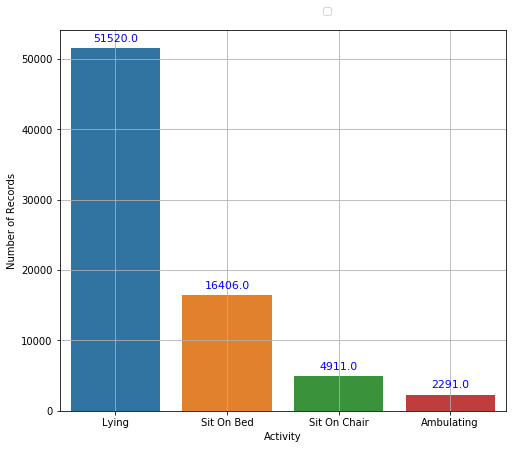

In [79]:
## plot Graph for record count for each Activity Label 



Activity_df = pd.value_counts(df_data['Activity'])
Activity_df= pd.DataFrame(Activity_df)
Activity_df = Activity_df.reset_index()
Activity_df.columns = ['Activity', 'Number of Record']   
    
ab = Activity_df
plt.figure(figsize=(8,7))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
                )                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='Activity', y='Number of Record', data=ab )
ax.set(xlabel = 'Activity', ylabel = 'Number of Records')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() }", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='blue', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

<Figure size 576x504 with 0 Axes>

No handles with labels found to put in legend.


[Text(0, 0.5, 'Number of Record'), Text(0.5, 0, 'Activity')]

Text(0, 10, '68.58%')

Text(0, 10, '21.84%')

Text(0, 10, '6.54%')

Text(0, 10, '3.05%')

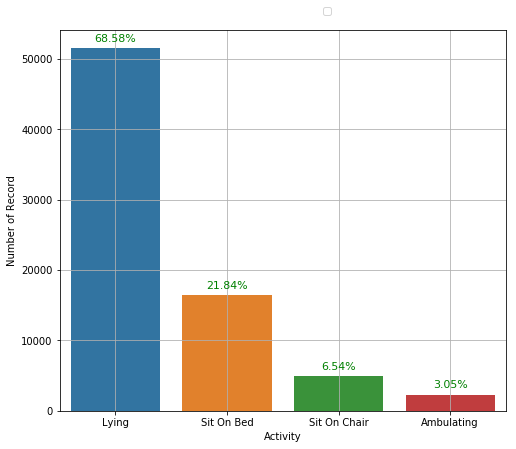

In [80]:
# Activity Type Distribution - Annotation with Percenatage
ab = Activity_df
plt.figure(figsize=(8,7))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
                )                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='Activity', y='Number of Record', data=ab )
ax.set(xlabel = 'Activity', ylabel = 'Number of Record')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / ab['Number of Record'].sum():.2f}%", 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='green', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

- Label of activity, 1: sit on bed, 2: sit on chair, 3: lying, 4: ambulating:-

1. There are 68.58% record for Activity 3 (Lying)
2. There are  21.84% record for Activity 1 (Sit on bed)
3. There are 6.54% Record for Activity 2 (Sit on Chair)
4. There are 3.05%record for Activity 4 ( Ambulating)

,Activity,Number of Record
0,Lying,51520
1,Sit On Bed,16406
2,Sit On Chair,4911
3,Ambulating,2291


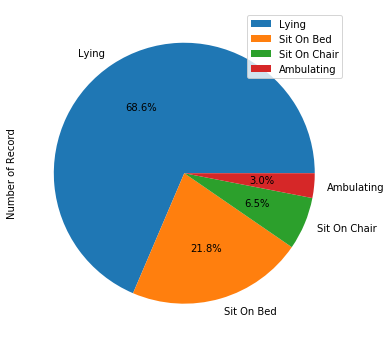

In [81]:
### Activity label data distribution

Activity_df
Activity_df.plot.pie(y='Number of Record', figsize=(8, 6),labels=Activity_df['Activity'],autopct='%1.1f%%')
plt.show()

,Gender,Number of Record
0,F,43828
1,M,31300


<Figure size 576x504 with 0 Axes>

No handles with labels found to put in legend.


[Text(0, 0.5, 'Number of Records'), Text(0.5, 0, 'Gender')]

Text(0, 10, '43828.0')

Text(0, 10, '31300.0')

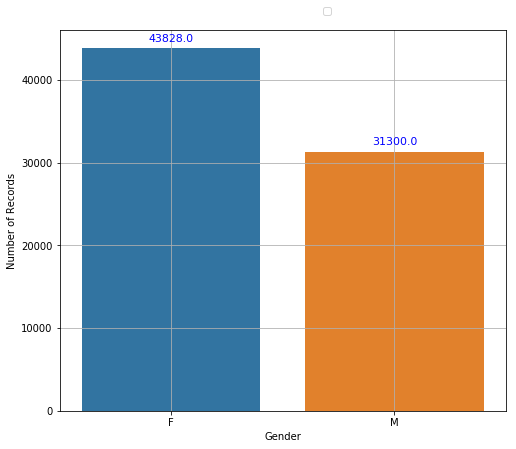

In [82]:
## Plot Gender Distribution 

Activity_df = pd.value_counts(df_data['Gender'])
Activity_df= pd.DataFrame(Activity_df)
Activity_df = Activity_df.reset_index()
Activity_df.columns = ['Gender', 'Number of Record']
Activity_df

 #Annotation with number
ab = Activity_df
plt.figure(figsize=(8,7))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
                 )                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='Gender', y='Number of Record', data=ab )
ax.set(xlabel = 'Gender', ylabel = 'Number of Records')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() }", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='blue', rotation=0, xytext=(0, 10),
         textcoords='offset points') 


1. There are 43282 record for Gender Female
2. There are  31300  record for Gender Male


<Figure size 576x504 with 0 Axes>

No handles with labels found to put in legend.


[Text(0, 0.5, 'Number of Record'), Text(0.5, 0, 'Gender')]

Text(0, 10, '58.34%')

Text(0, 10, '41.66%')

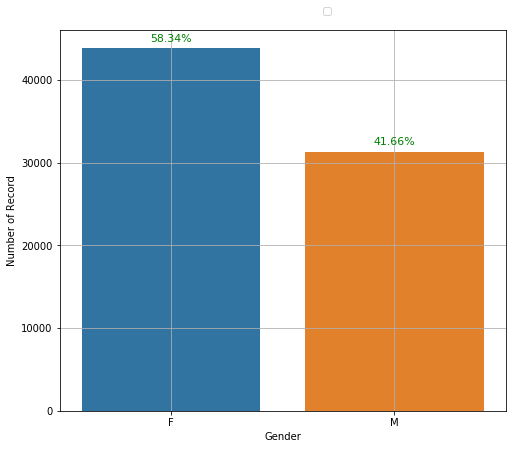

In [83]:
# Gender  Distribution - Annotation with Percenatage
ab = Activity_df
plt.figure(figsize=(8,7))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
                )                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='Gender', y='Number of Record', data=ab )
ax.set(xlabel = 'Gender', ylabel = 'Number of Record')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / ab['Number of Record'].sum():.2f}%", 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='green', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

1. There are 58.34% record for Gender Female
2. There are  41.66  record for Gender Male

,Gender,Number of Record
0,F,43828
1,M,31300


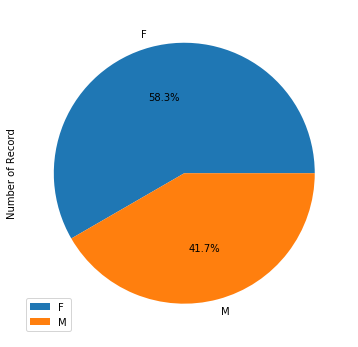

In [84]:

### Pie chart for Gender Distribution

Activity_df
Activity_df.plot.pie(y='Number of Record', figsize=(8, 6),labels=Activity_df['Gender'],autopct='%1.1f%%')
plt.show()



,Room,Number of Record
0,1,52482
1,2,22646


<Figure size 576x360 with 0 Axes>

No handles with labels found to put in legend.


[Text(0, 0.5, 'Number of Records'), Text(0.5, 0, 'Room')]

Text(0, 10, '52482.0')

Text(0, 10, '22646.0')

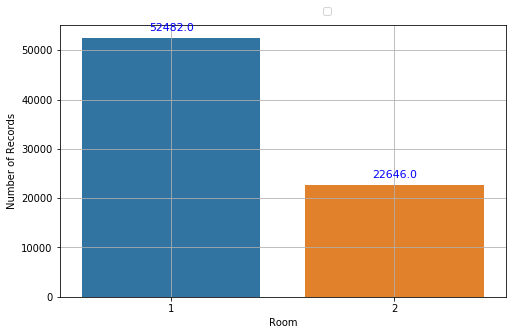

In [85]:
# Room Level Distribution

Activity_df = pd.value_counts(df_data['Room'])
Activity_df= pd.DataFrame(Activity_df)
Activity_df = Activity_df.reset_index()
Activity_df.columns = ['Room', 'Number of Record']
Activity_df

 #Annotation with number
ab = Activity_df
plt.figure(figsize=(8,5))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
                )                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='Room', y='Number of Record', data=ab )
ax.set(xlabel = 'Room', ylabel = 'Number of Records')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() }", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='blue', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

There are 52482 record for Room 1 and 22646 record for Room 2

,Room,Number of Record
0,1,52482
1,2,22646


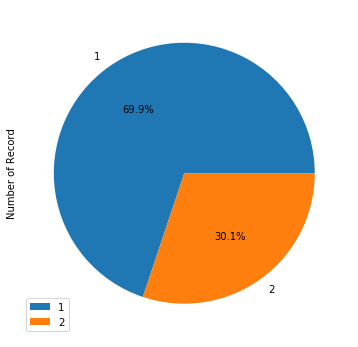

In [86]:
### Pie chart for Room Distribution

Activity_df
Activity_df.plot.pie(y='Number of Record', figsize=(8, 6),labels=Activity_df['Room'],autopct='%1.1f%%')
plt.show()


#### 3. Exploratory data analysis

>  ### 3.1 Univariate Analysis

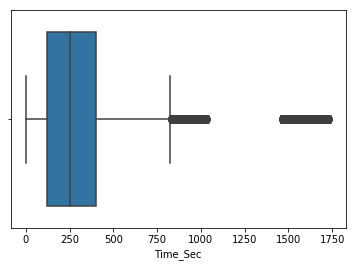

In [87]:
#Boxplot on df_data for Time_Second column to check for outliers

sns.boxplot(x=df_data['Time_Sec'])

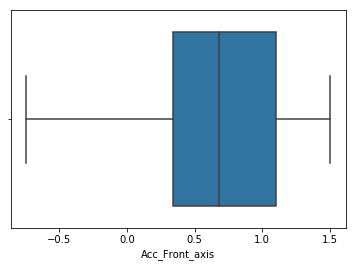

In [88]:
#Boxplot on df_data for Time_Second column to check for outliers

sns.boxplot(x=df_data['Acc_Front_axis'])

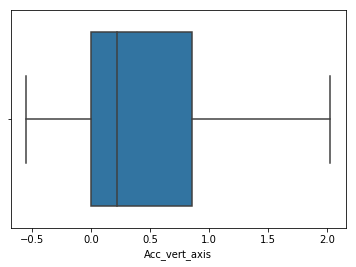

In [89]:
#Boxplot on df_data for Time_Second column to check for outliers

sns.boxplot(x=df_data['Acc_vert_axis'])

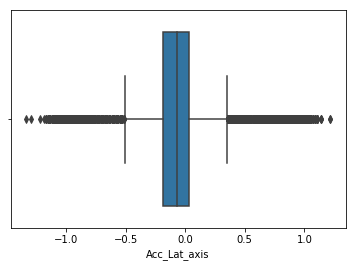

In [90]:
#Boxplot on df_data for Time_Second column to check for outliers

sns.boxplot(x=df_data['Acc_Lat_axis'])

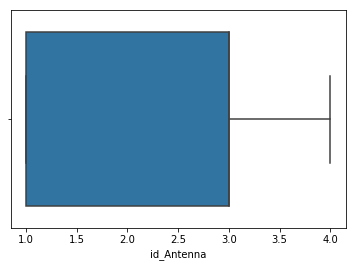

In [91]:
#Boxplot on df_data for Time_Second column to check for outliers

sns.boxplot(x=df_data['id_Antenna'])

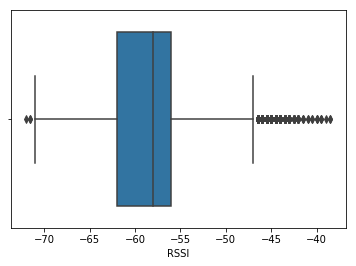

In [92]:
#Boxplot on df_data for Time_Second column to check for outliers

sns.boxplot(x=df_data['RSSI'])

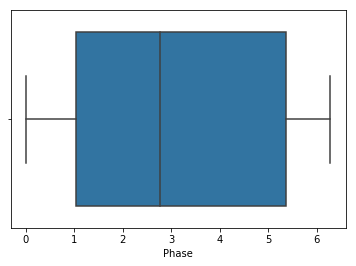

In [93]:
#Boxplot on df_data for Time_Second column to check for outliers

sns.boxplot(x=df_data['Phase'])

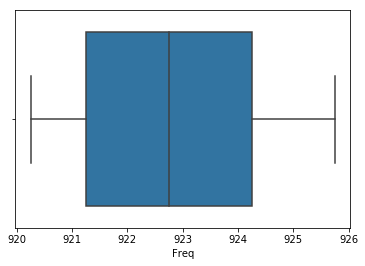

In [94]:
#Boxplot on df_data for Time_Second column to check for outliers

sns.boxplot(x=df_data['Freq'])

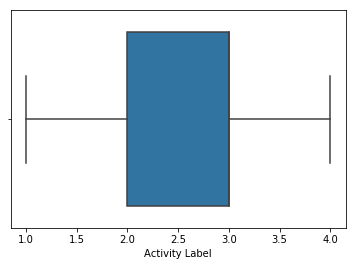

In [95]:
#Boxplot on df_data for Time_Second column to check for outliers

sns.boxplot(x=df_data['Activity Label'])

-- There is no Outlier Present in Final Dataset

>  ### 3.2 Bi-variate Analysis

In [96]:
Activity_df = df_data.groupby(['Activity'])['Acc_Front_axis'].mean()

Activity_df = pd.DataFrame(Activity_df)
Activity_df = Activity_df.reset_index()
Activity_df.columns = ['Activity', 'Acc_Front_axis_mean']
Activity_df

,Activity,Acc_Front_axis_mean
0,Ambulating,0.235359
1,Lying,0.858132
2,Sit On Bed,0.374728
3,Sit On Chair,0.561866


- Front axis mean is high for Activity 3(lying)

<Figure size 576x360 with 0 Axes>

No handles with labels found to put in legend.


[Text(0, 0.5, 'Acc_Front_axis_mean'), Text(0.5, 0, 'Activity')]

Text(0, 10, '0.2353591381056308')

Text(0, 10, '0.8581320574495958')

Text(0, 10, '0.3747277379373341')

Text(0, 10, '0.5618655504581599')

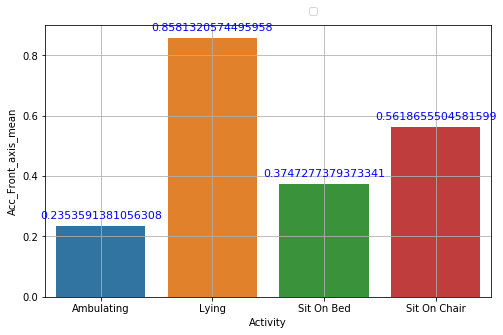

In [97]:
# Activity Type Distribution - Annotation with Percenatage
ab = Activity_df
        
 #Annotation with number
ab =  Activity_df
plt.figure(figsize=(8,5))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
                )                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='Activity', y='Acc_Front_axis_mean', data=ab )
ax.set(xlabel = 'Activity', ylabel = 'Acc_Front_axis_mean')
ax.grid(True)

for p in ax.patches:
     ax.annotate(f"{p.get_height() }", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='blue', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

- Front axis mean is high for Activity 3(lying)

In [98]:
Activity_df = df_data.groupby(['Activity'])['Acc_vert_axis'].mean()

Activity_df = pd.DataFrame(Activity_df)
Activity_df = Activity_df.reset_index()
Activity_df.columns = ['Activity', 'Acc_vert_axis_mean']
Activity_df

,Activity,Acc_vert_axis_mean
0,Ambulating,0.958184
1,Lying,0.083936
2,Sit On Bed,0.925596
3,Sit On Chair,0.861181


- Acc_vert_axis_mean is high for Activity 4(4(Ambulating))

<Figure size 576x360 with 0 Axes>

No handles with labels found to put in legend.


[Text(0, 0.5, 'Acc_vert_axis_mean'), Text(0.5, 0, 'Activity')]

Text(0, 10, '0.9581838105630731')

Text(0, 10, '0.08393569730007412')

Text(0, 10, '0.9255956562233465')

Text(0, 10, '0.8611805436774691')

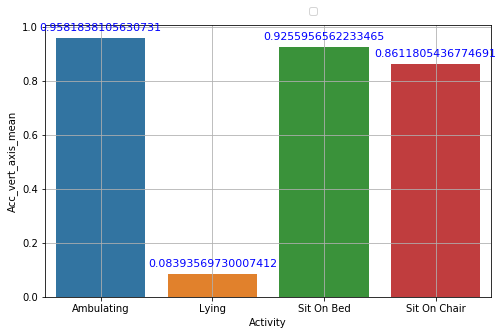

In [99]:
# Activity Type Distribution - Annotation with Percenatage
ab = Activity_df
        
 #Annotation with number
ab =  Activity_df
plt.figure(figsize=(8,5))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
               )                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='Activity', y='Acc_vert_axis_mean', data=ab )
ax.set(xlabel = 'Activity', ylabel = 'Acc_vert_axis_mean')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() }", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='blue', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

- Acc_vert_axis_mean is high for Activity 4(Ambulating)

In [100]:
Activity_df = df_data.groupby(['Activity'])['Acc_Lat_axis'].mean()

Activity_df = pd.DataFrame(Activity_df)
Activity_df = Activity_df.reset_index()
Activity_df.columns = ['Activity', 'Acc_Lat_axis_mean']
Activity_df

,Activity,Acc_Lat_axis_mean
0,Ambulating,0.009172
1,Lying,-0.332346
2,Sit On Bed,0.029444
3,Sit On Chair,0.056966


<Figure size 576x360 with 0 Axes>

No handles with labels found to put in legend.


[Text(0, 0.5, 'Acc_Lat_axis_mean'), Text(0.5, 0, 'Activity')]

Text(0, 10, '0.009172285290266334')

Text(0, 10, '-0.3323456857725154')

Text(0, 10, '0.02944432285749527')

Text(0, 10, '0.05696592441457993')

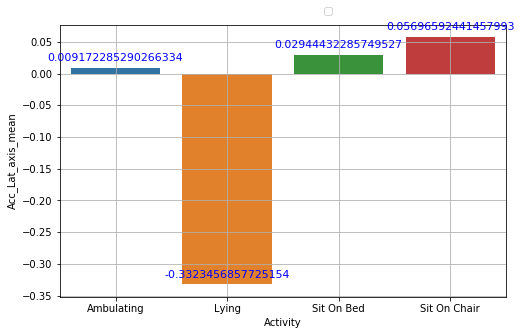

In [101]:
# Activity Type Distribution - Annotation with Percenatage
ab = Activity_df
        
 #Annotation with number
ab =  Activity_df
plt.figure(figsize=(8,5))
ax=plt.legend(bbox_to_anchor=(0.1, 1.0, 1., .102),loc=10, ncol=4,  #left, bottom, width, height
                )                 
ax.get_title().set_fontsize('20')
ax = sns.barplot(x='Activity', y='Acc_Lat_axis_mean', data=ab )
ax.set(xlabel = 'Activity', ylabel = 'Acc_Lat_axis_mean')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() }", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='blue', rotation=0, xytext=(0, 10),
         textcoords='offset points') 

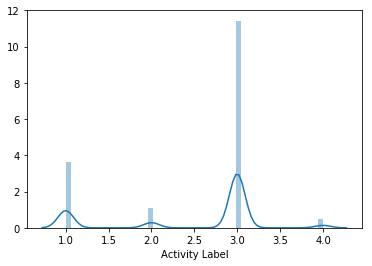

In [102]:
#Dis plot for Activity label data 
sns.distplot(df_data['Activity Label'])
plt.show()

<Figure size 1080x1080 with 0 Axes>

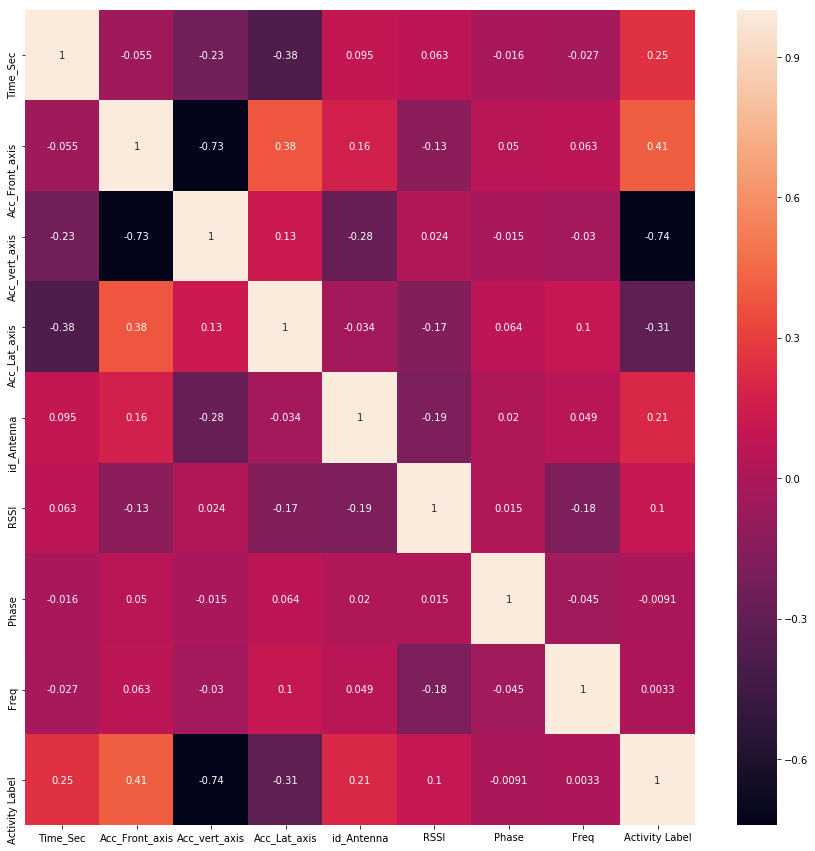

In [103]:
#Check Correlation of this dataset
import seaborn as sns; 
plt.figure(figsize=(15,15))
sns.heatmap(df_data.corr(),annot=True)

In [104]:
df_data.columns

Index(['Time_Sec', 'Acc_Front_axis', 'Acc_vert_axis', 'Acc_Lat_axis',
       'id_Antenna', 'RSSI', 'Phase', 'Freq', 'Activity Label', 'Gender',
       'Room', 'Activity'],
      dtype='object')

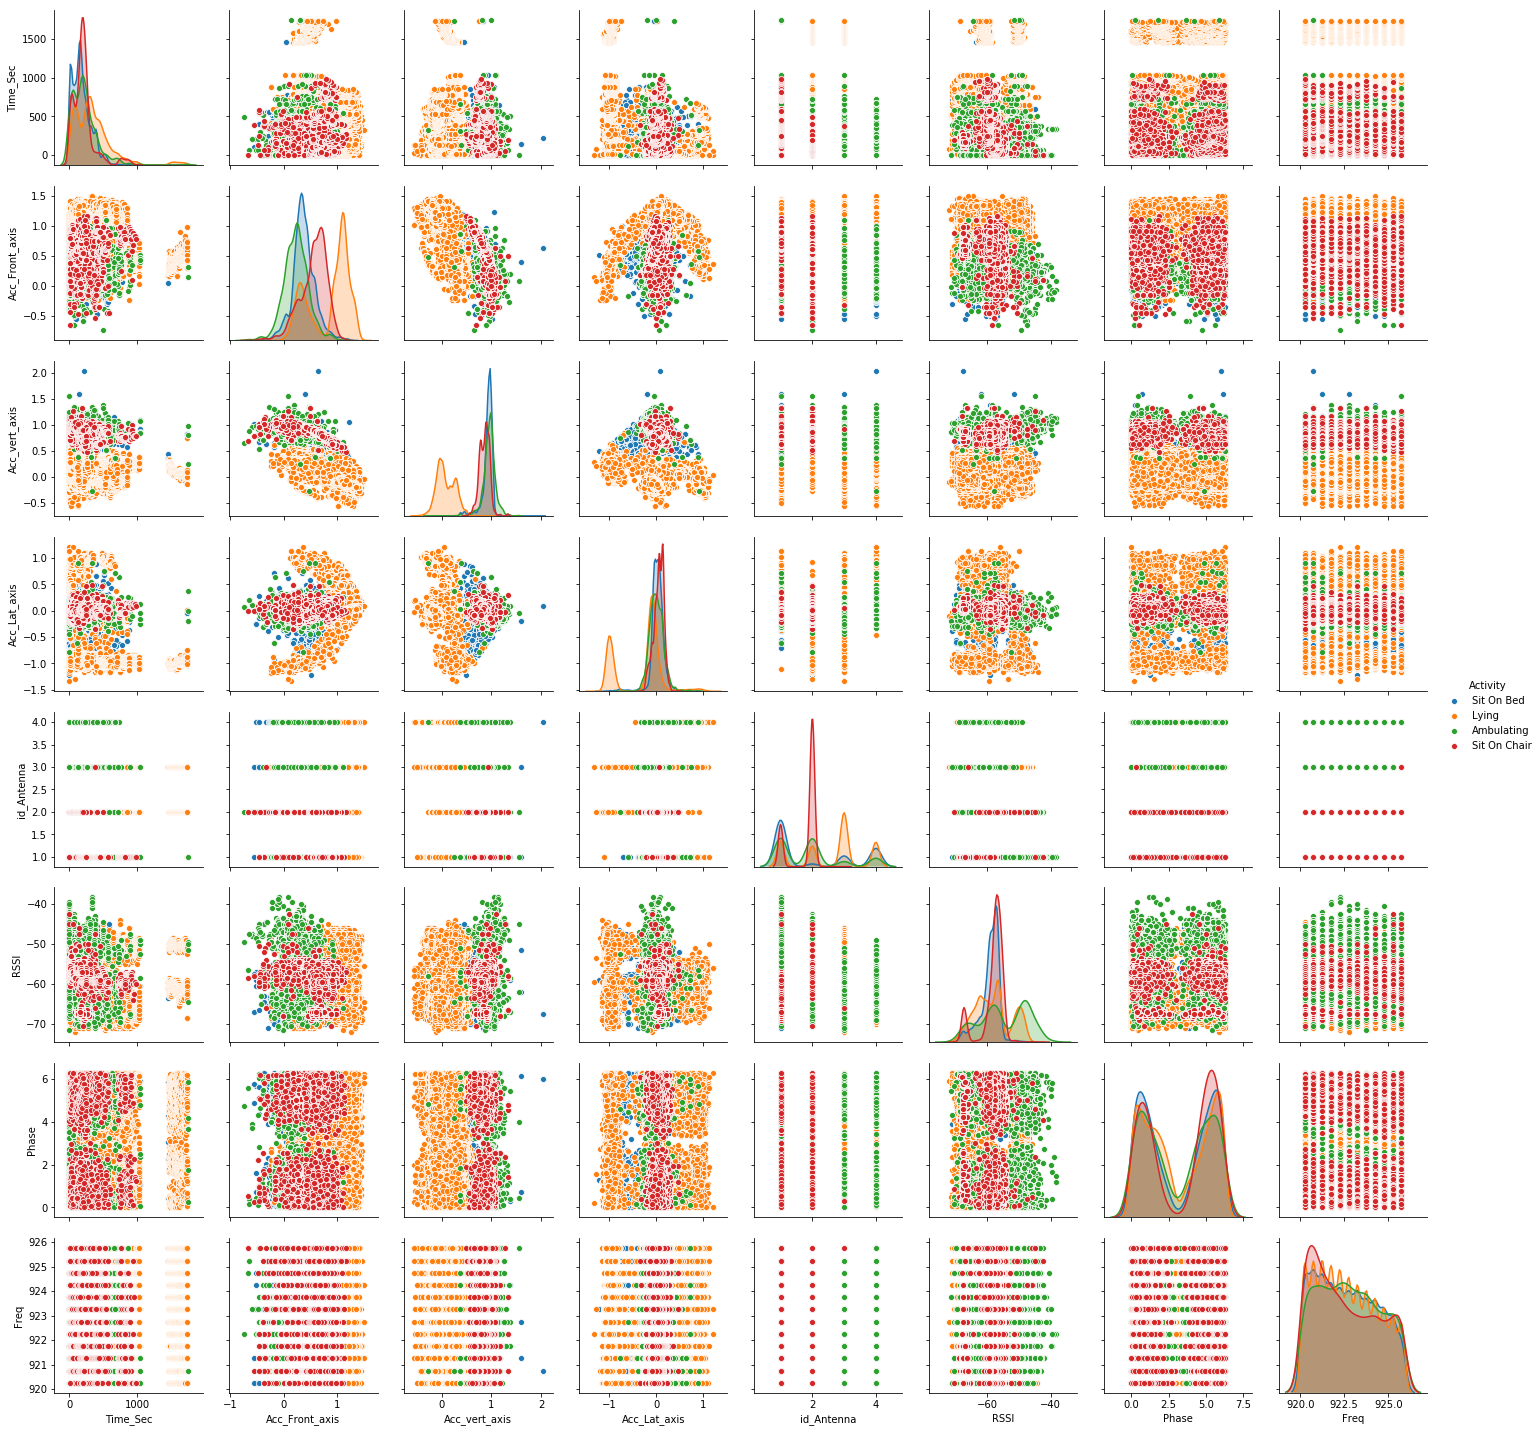

In [105]:
df_data_N=df_data[['Time_Sec', 'Acc_Front_axis', 'Acc_vert_axis', 'Acc_Lat_axis',
       'id_Antenna', 'RSSI', 'Phase', 'Freq',  'Activity']]
sns.pairplot(df_data_N,hue='Activity')

<Figure size 1080x1080 with 0 Axes>

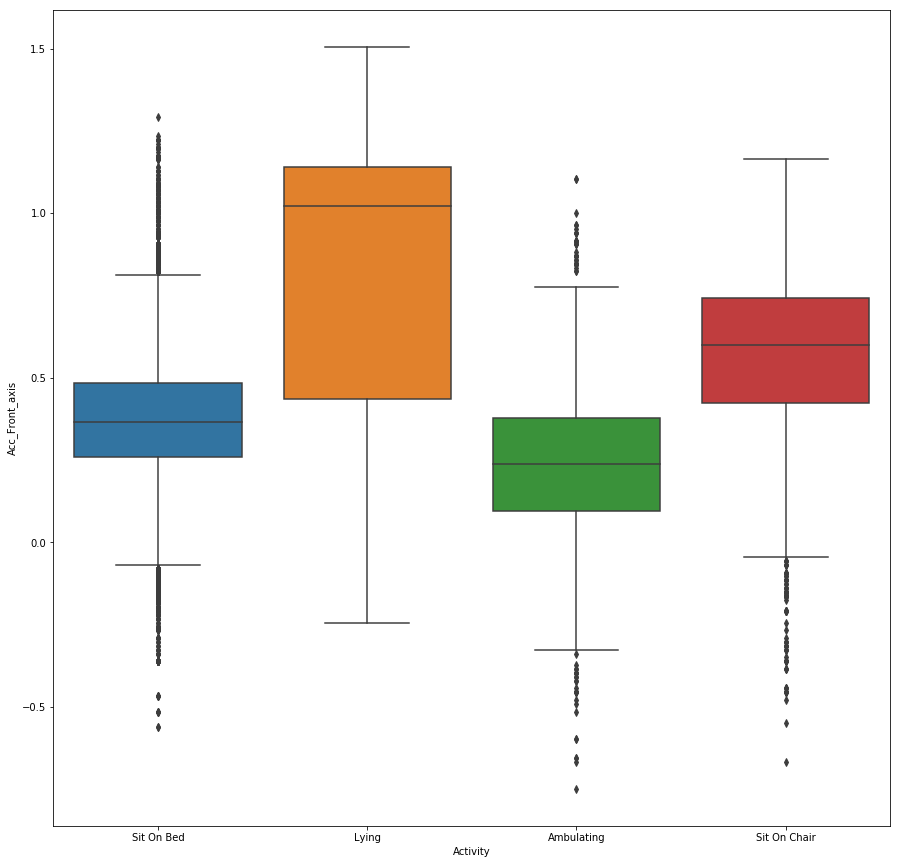

In [106]:
plt.figure(figsize=(15,15))
ax = sns.boxplot(x="Activity", y="Acc_Front_axis", data=df_data)

<Figure size 1080x1080 with 0 Axes>

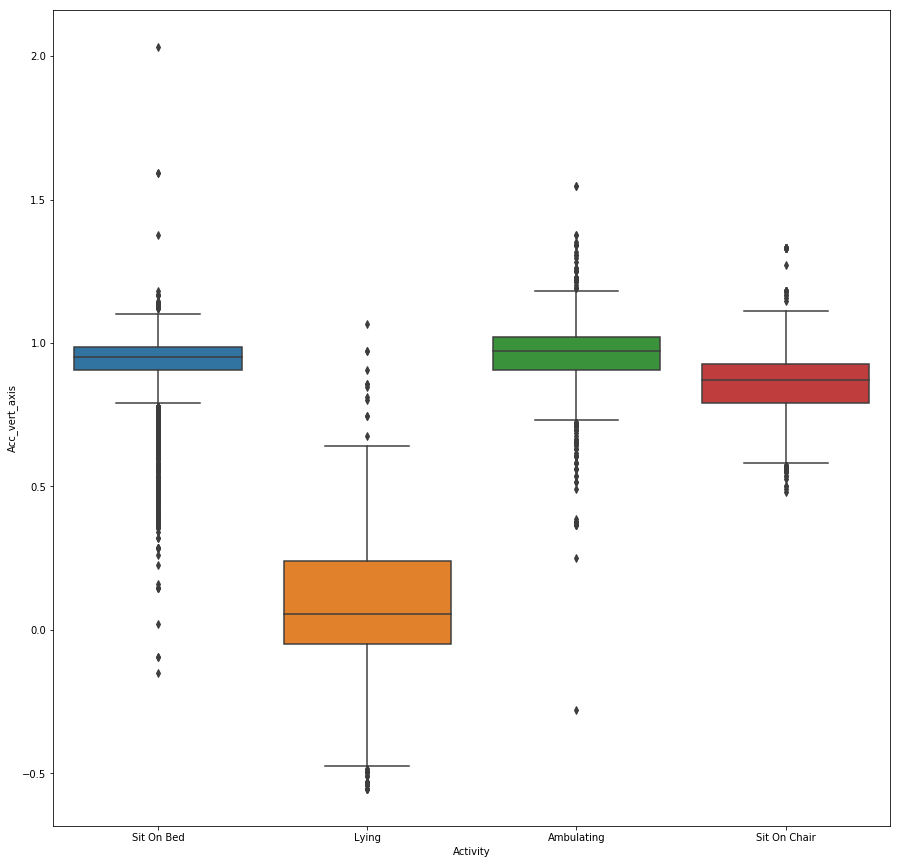

In [107]:
plt.figure(figsize=(15,15))
ax = sns.boxplot(x="Activity", y="Acc_vert_axis", data=df_data)

<Figure size 1080x1080 with 0 Axes>

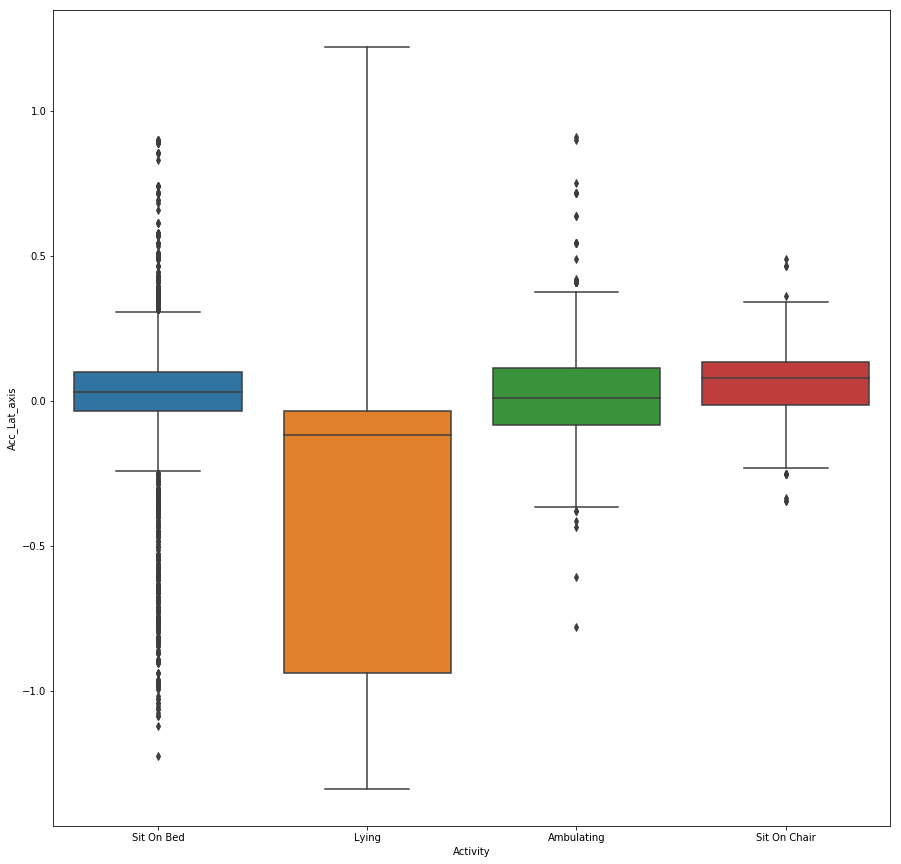

In [108]:
plt.figure(figsize=(15,15))
ax = sns.boxplot(x="Activity", y="Acc_Lat_axis", data=df_data)

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Activity')]

Text(0, 10, '8112')

Text(0, 10, '19482')

Text(0, 10, '877')

Text(0, 10, '2829')

Text(0, 10, '8294')

Text(0, 10, '32038')

Text(0, 10, '1414')

Text(0, 10, '2082')

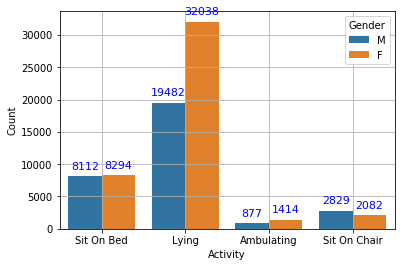

In [109]:




                                

ax = sns.countplot(x="Activity", hue="Gender", data=df_data)
ax.set(xlabel = 'Activity', ylabel = 'Count')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() }", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='blue', rotation=0, xytext=(0, 10),
         textcoords='offset points')


[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Activity')]

Text(0, 10, '15162')

Text(0, 10, '30983')

Text(0, 10, '1956')

Text(0, 10, '4381')

Text(0, 10, '1244')

Text(0, 10, '20537')

Text(0, 10, '335')

Text(0, 10, '530')

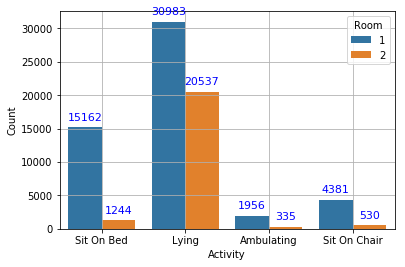

In [110]:
#ax = sns.countplot(x="Activity", hue="Room", data=df_data)


ax = sns.countplot(x="Activity", hue="Room", data=df_data)
ax.set(xlabel = 'Activity', ylabel = 'Count')
ax.grid(True)
for p in ax.patches:
     ax.annotate(f"{p.get_height() }", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='blue', rotation=0, xytext=(0, 10),
         textcoords='offset points')


In [111]:
# As room and Gender  are categorical variable so create Dummy variable for Room and Gender

dummy = pd.get_dummies(df_data[['Room' ,'Gender']], drop_first=True)

# Add the results to the master dataframe
df_data_Dummy= pd.concat([df_data, dummy], axis=1)

df_data=df_data.drop(['Room','Gender',],axis=1)
df_data_Dummy= df_data_Dummy.drop(['Room','Gender','Activity'],axis=1)
df_data.shape


(75128, 10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A295706B70>,
      dtype=object)

<Figure size 1080x720 with 0 Axes>

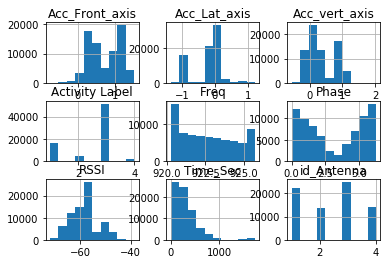

<Figure size 1080x720 with 0 Axes>

In [112]:
df_data.hist()
plt.figure(figsize=(15,10))
plt.show()

In [113]:
df_data_Dummy.to_csv("df_data_Dummy.csv",index=False)

In [114]:
df_data_Dummy.head()

,Time_Sec,Acc_Front_axis,Acc_vert_axis,Acc_Lat_axis,id_Antenna,RSSI,Phase,Freq,Activity Label,Room_2,Gender_M
0,0.00,0.27203,1.00820,-0.082102,1,-63.5,2.4252,924.25,1,0,1
1,0.50,0.27203,1.00820,-0.082102,1,-63.0,4.7369,921.75,1,0,1
2,1.50,0.44791,0.91636,-0.013684,1,-63.5,3.0311,923.75,1,0,1
3,1.75,0.44791,0.91636,-0.013684,1,-63.0,2.0371,921.25,1,0,1
4,2.50,0.34238,0.96229,-0.059296,1,-63.5,5.8920,920.25,1,0,1


# 3.  Data Prepation 

In [86]:
## Devide the data between X and Y

X= df_data.drop(['Activity Label'],1)
Y=df_data['Activity Label']


In [87]:
#Standardize the inputs
#normalize=Normalizer()
features = ['Time_Sec', 'Acc_Front_axis', 'Acc_vert_axis', 'Acc_Lat_axis',
      'id_Antenna', 'RSSI', 'Phase', 'Freq']
#X[features] = normalize.fit_transform(X[features])

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X[features] = scaler.fit_transform(X[features])

In [88]:
## Print X after normalization
X

,Time_Sec,Acc_Front_axis,Acc_vert_axis,Acc_Lat_axis,id_Antenna,RSSI,Phase,Freq,Gender,Room,Activity
0,0.000000,0.453124,0.604442,0.491073,0.000000,0.253731,0.386074,0.727273,M,1,Sit On Bed
1,0.000287,0.453124,0.604442,0.491073,0.000000,0.268657,0.754079,0.272727,M,1,Sit On Bed
2,0.000862,0.531249,0.568896,0.517859,0.000000,0.253731,0.482529,0.636364,M,1,Sit On Bed
3,0.001006,0.531249,0.568896,0.517859,0.000000,0.268657,0.324291,0.181818,M,1,Sit On Bed
4,0.001437,0.484373,0.586673,0.500002,0.000000,0.253731,0.937963,0.000000,M,1,Sit On Bed
5,0.001868,0.484373,0.586673,0.500002,1.000000,0.462687,0.199994,0.818182,M,1,Sit On Bed
6,0.002300,0.468751,0.600006,0.495537,0.000000,0.253731,0.616362,0.454545,M,1,Sit On Bed
7,0.002875,0.453124,0.600006,0.486608,0.000000,0.238806,0.397074,0.727273,M,1,Sit On Bed
8,0.003162,0.437498,0.613344,0.473217,0.000000,0.223881,0.319659,0.818182,M,1,Sit On Bed
9,0.003449,0.437498,0.613344,0.473217,0.000000,0.179104,0.189503,1.000000,M,1,Sit On Bed


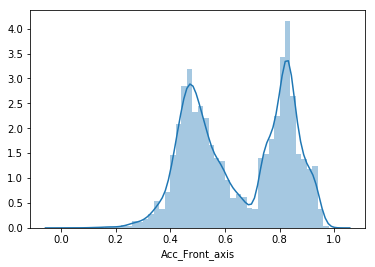

In [89]:
sns.distplot(X['Acc_Front_axis'])
plt.show()

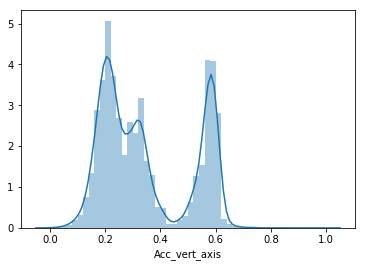

In [90]:
sns.distplot(X['Acc_vert_axis'])
plt.show()
plt.show()

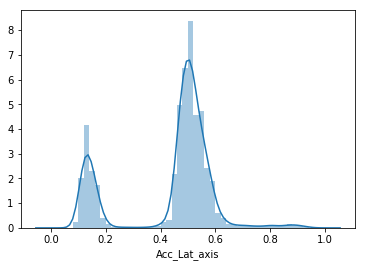

In [91]:
sns.distplot(X['Acc_Lat_axis'])
plt.show()

In [92]:
## Split the data between test and train split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size = 0.7,test_size =0.3,random_state =100)

#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [142]:
X_train.shape

(52589, 11)

In [143]:
X_test.shape

(22539, 11)